In [1]:
import pandas as pd
import numpy as np
import os

In [ ]:
# source : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

In [18]:
os.chdir(r'C:\Users\lilie\Downloads\climate_change')
df = pd.read_csv('city_temperature.csv')
df

C:\Users\lilie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [3]:
df.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [4]:
df.State.value_counts()
#missing states values because it's only concerning USA

Texas                     129711
Ohio                       64855
Florida                    61341
Pennsylvania               52076
Michigan                   46325
New York                   46325
California                 46325
Indiana                    37060
Illinois                   37060
Oregon                     37060
Alabama                    37060
Georgia                    37060
Tennessee                  37060
North Carolina             37060
Colorado                   37060
Louisiana                  33593
Maryland                   27795
Washington                 27795
Kansas                     27795
Nebraska                   27795
Alaska                     27795
Missouri                   27795
Kentucky                   27795
Wisconsin                  27795
Virginia                   27795
Montana                    27794
Arizona                    26484
West Virginia              18530
Oklahoma                   18530
District of Columbia       18530
Connecticu

In [5]:
df.loc[df.State.isna()]

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
1450985,South/Central America & Carribean,Venezuela,NaN,Caracas,5,8,2020,80.5
1450986,South/Central America & Carribean,Venezuela,NaN,Caracas,5,9,2020,81.3
1450987,South/Central America & Carribean,Venezuela,NaN,Caracas,5,10,2020,80.2
1450988,South/Central America & Carribean,Venezuela,NaN,Caracas,5,11,2020,81.1


In [6]:
df.Year.value_counts()

2000    119682
1999    119355
2001    119355
2002    119355
2003    119140
1998    119082
1996    118951
1997    118656
2004    118645
1995    118616
2005    117895
2006    117647
2010    115627
2007    115428
2008    114908
2009    114247
2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
201        351
200         89
Name: Year, dtype: int64

In [19]:
df2 = df.copy()
#drop year 200 & year 201
row_to_drop = df2.index[(df.Year==200) | (df.Year==201)]
df2.drop(row_to_drop, axis=0, inplace=True)
df2.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [11]:
df2.Region.value_counts()

North America                        1556652
Europe                                381695
Asia                                  316663
Africa                                251002
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: Region, dtype: int64

In [4]:
df2.AvgTemperature.value_counts().sort_index(ascending=True)

-99.0     79232
-50.0         1
-49.1         1
-47.7         1
-46.9         1
          ...  
 109.5        1
 109.7        1
 109.8        1
 109.9        4
 110.0        1
Name: AvgTemperature, Length: 1517, dtype: int64

In [ ]:
#about temperature (https://academic.udayton.edu/kissock/http/Weather/source.htm)
#The data fields in each file posted on this site are: month, day, year, average daily temperature (F).  
#We use "-99" as a no-data flag when data are not available.

# => drop -99 rows

In [37]:
df2.loc[df2.AvgTemperature==-99].Region.value_counts()

Africa                               30083
Europe                               12993
South/Central America & Carribean    12839
Asia                                 10500
North America                         8492
Middle East                           3938
Australia/South Pacific                387
Name: Region, dtype: int64

In [20]:
#drop avg temp = -99
df2.drop(df2.index[df2.AvgTemperature==-99], axis=0, inplace=True)

In [39]:
df2.AvgTemperature.value_counts().sort_index(ascending=True)
#it's ok now

-50.0     1
-49.1     1
-47.7     1
-46.9     1
-46.2     1
         ..
 109.5    1
 109.7    1
 109.8    1
 109.9    4
 110.0    1
Name: AvgTemperature, Length: 1516, dtype: int64

In [21]:
# farenheit to celsius
#(T(°F) - 32) × 5/9
df2['AvgCelsiusTemp'] = [round((i-32)*(5/9),2) for i in df2.AvgTemperature]
df2.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgCelsiusTemp
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.83


In [22]:
df2.drop('AvgTemperature', axis=1, inplace=True)

In [7]:
df2.head()

,Region,Country,State,City,Month,Day,Year,AvgCelsiusTemp
0,Africa,Algeria,NaN,Algiers,1,1,1995,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,8.83


In [26]:
df2.AvgCelsiusTemp.value_counts().sort_index(ascending=True)

-45.56    1
-45.06    1
-44.28    1
-43.83    1
-43.44    1
         ..
 43.06    1
 43.17    1
 43.22    1
 43.28    4
 43.33    1
Name: AvgCelsiusTemp, Length: 1516, dtype: int64

In [28]:
df2.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\project4_ClimateChange\Statistically_Significant_Insights\city_temp_cleaned.csv', index = False)

In [45]:
country_tokeep = ['Argentina','Australia','Brazil','Canada','China','India','Indonesia','Japan',
                  'South Korea','Mexico','Russia','Saudi Arabia','South Africa','United Kingdom','US','Turkey']
ue_country_tokeep = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Finland',
                    'France','Germany','Greece','Hungary','Ireland','Italy','Latvia','The Netherlands',
                    'Poland','Portugal','Romania','Slovakia','Spain','Sweden']

#Lithuania NOT IN DF
#Luxembourg NOT IN DF
#Slovenia NOT IN DF
#ESTONIA NOT IN DF
#Malta NOT IN DF

In [107]:
# selecting rows based on countries we'll study
df_G20 = df2.loc[(df2['Country'].isin(country_tokeep)) | (df2['Country'].isin(ue_country_tokeep))]

In [108]:
# selecting year from 1995 to 2018  to compare with gaz emission dataset
yr_todrop = df_G20.index[(df_G20.Year==2020) | (df_G20.Year==2019)]
len(yr_todrop)

106210

In [109]:
df_G20.drop(yr_todrop, axis=0, inplace=True)

C:\Users\lilie\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [110]:
df_G20.drop(['Month','Day'], axis=1, inplace=True)

In [111]:
df4 = df_G20.groupby(['City','Country','Region','Year'], as_index=False)[['AvgCelsiusTemp']].mean()
df4

,City,Country,Region,Year,AvgCelsiusTemp
0,Abilene,US,North America,1995,17.443178
1,Abilene,US,North America,1996,17.442745
2,Abilene,US,North America,1997,16.982521
3,Abilene,US,North America,1998,19.228670
4,Abilene,US,North America,1999,18.919121
...,...,...,...,...,...
5302,Zagreb,Croatia,Europe,2014,13.456181
5303,Zagreb,Croatia,Europe,2015,13.169451
5304,Zagreb,Croatia,Europe,2016,12.684626
5305,Zagreb,Croatia,Europe,2017,13.095644


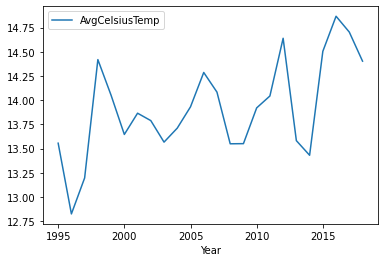

In [112]:
df4[['Year','AvgCelsiusTemp']].groupby('Year').mean().plot()

In [113]:
df4['State'] = ["EU" if i in (ue_country_tokeep) else '' for i in df4.Country]

In [20]:
df4

,City,Country,Region,Year,AvgCelsiusTemp,State
0,Abilene,US,North America,1995,17.443178,
1,Abilene,US,North America,1996,17.442745,
2,Abilene,US,North America,1997,16.982521,
3,Abilene,US,North America,1998,19.228670,
4,Abilene,US,North America,1999,18.919121,
...,...,...,...,...,...,...
5302,Zagreb,Croatia,Europe,2014,13.456181,EU
5303,Zagreb,Croatia,Europe,2015,13.169451,EU
5304,Zagreb,Croatia,Europe,2016,12.684626,EU
5305,Zagreb,Croatia,Europe,2017,13.095644,EU


In [21]:
df4.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\city_temp_cleaned.csv', index = False)

In [46]:
df5 = df2.groupby(['Country','Region','Year'], as_index=False)[['AvgCelsiusTemp']].mean()
df5['State'] = ["EU" if i in (ue_country_tokeep) else 'Not EU' for i in df5.Country]
df5

,Country,Region,Year,AvgCelsiusTemp,State
0,Albania,Europe,1997,22.186957,Not EU
1,Albania,Europe,1998,16.451500,Not EU
2,Albania,Europe,1999,17.287279,Not EU
3,Albania,Europe,2000,17.320836,Not EU
4,Albania,Europe,2001,16.242040,Not EU
...,...,...,...,...,...
3059,Zambia,Africa,2010,19.039836,Not EU
3060,Zambia,Africa,2011,20.771486,Not EU
3061,Zambia,Africa,2012,20.971019,Not EU
3062,Zambia,Africa,2013,21.074698,Not EU


In [47]:
df5.loc[df5.State=='Not EU']

,Country,Region,Year,AvgCelsiusTemp,State
0,Albania,Europe,1997,22.186957,Not EU
1,Albania,Europe,1998,16.451500,Not EU
2,Albania,Europe,1999,17.287279,Not EU
3,Albania,Europe,2000,17.320836,Not EU
4,Albania,Europe,2001,16.242040,Not EU
...,...,...,...,...,...
3059,Zambia,Africa,2010,19.039836,Not EU
3060,Zambia,Africa,2011,20.771486,Not EU
3061,Zambia,Africa,2012,20.971019,Not EU
3062,Zambia,Africa,2013,21.074698,Not EU


In [116]:
df5.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\country_temp_cleaned.csv', index = False)

In [23]:
df2.shape

(2826655, 8)

In [ ]:
#MERGE

In [25]:
os.chdir(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\archives')
df_gaz = pd.read_csv('Gas_global.csv')
df_gaz

,Unnamed: 0,Country,Date,CO2,F-Gas,N2O,State
0,0,Argentina,1995,113.81,1.22,36.72,Not EU
1,1,Argentina,1996,126.56,1.67,37.02,Not EU
2,2,Argentina,1997,127.32,2.11,37.41,Not EU
3,3,Argentina,1998,133.17,2.53,37.04,Not EU
4,4,Argentina,1999,134.19,2.95,37.32,Not EU
...,...,...,...,...,...,...,...
955,571,Sweden,2014,39.10,1.06,4.92,EU
956,572,Sweden,2015,39.20,1.01,4.99,EU
957,573,Sweden,2016,38.79,0.99,4.96,EU
958,574,Sweden,2017,38.33,0.92,5.10,EU


In [49]:
df_gaz.rename(columns={'Date': 'Year'}, inplace=True)
del df_gaz['Unnamed: 0']
df_gaz.head()

,Country,Year,CO2,F-Gas,N2O,State
0,Argentina,1995,113.81,1.22,36.72,Not EU
1,Argentina,1996,126.56,1.67,37.02,Not EU
2,Argentina,1997,127.32,2.11,37.41,Not EU
3,Argentina,1998,133.17,2.53,37.04,Not EU
4,Argentina,1999,134.19,2.95,37.32,Not EU


In [26]:
df_gaz['Country'] = df_gaz['Country'].replace(['Netherlands'],'The Netherlands')
df_gaz['Country'] = df_gaz['Country'].replace(['United States'],'US')

In [51]:
df_merged5 = df5.merge(df_gaz, on=['Country','Year','State'], how='left')
df_merged5

,Country,Region,Year,AvgCelsiusTemp,State,CO2,F-Gas,N2O
0,Albania,Europe,1997,22.186957,Not EU,NaN,NaN,NaN
1,Albania,Europe,1998,16.451500,Not EU,NaN,NaN,NaN
2,Albania,Europe,1999,17.287279,Not EU,NaN,NaN,NaN
3,Albania,Europe,2000,17.320836,Not EU,NaN,NaN,NaN
4,Albania,Europe,2001,16.242040,Not EU,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3059,Zambia,Africa,2010,19.039836,Not EU,NaN,NaN,NaN
3060,Zambia,Africa,2011,20.771486,Not EU,NaN,NaN,NaN
3061,Zambia,Africa,2012,20.971019,Not EU,NaN,NaN,NaN
3062,Zambia,Africa,2013,21.074698,Not EU,NaN,NaN,NaN


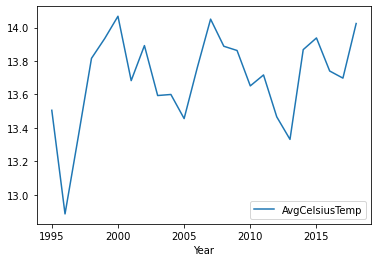

In [136]:
df_merged5[['Year','AvgCelsiusTemp']].groupby('Year').mean().plot()

In [155]:
df_merged.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_merged3.csv', index = False)

In [44]:
df2

,Region,Country,State,City,Month,Day,Year,AvgCelsiusTemp
0,Africa,Algeria,NaN,Algiers,1,1,1995,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,8.83
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,28.00
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,27.56
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,29.00
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,28.78


In [47]:
#redoing without the selection on countries in G20

df_all = df2.copy()
df_all.drop(['Month','Day'], axis=1, inplace=True)
yr_todrop = df_all.index[df_all.Year==2020]
df_all.drop(yr_todrop, axis=0, inplace=True)
df_all = df_all.groupby(['City','Country','Region','Year'], as_index=False)[['AvgCelsiusTemp']].mean()
df_all['AvgCelsiusTemp'] = [round(i,2) for i in df_all.AvgCelsiusTemp]

In [49]:
del df_all['City']

In [53]:
df_all = df_all.groupby(['Country','Region','Year'], as_index=False)[['AvgCelsiusTemp']].mean()

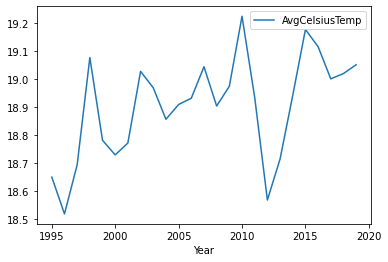

In [54]:
df_all[['Year','AvgCelsiusTemp']].groupby('Year').mean().plot()

In [20]:
df_all.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_all_temp.csv', index = False)

In [55]:
os.chdir(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data')

df_gaz = pd.read_csv('df_all_gaz.csv')
df_gaz['Country'] = df_gaz['Country'].replace(['Netherlands'],'The Netherlands')
df_gaz['Country'] = df_gaz['Country'].replace(['United States'],'US')
df_gaz.head()

,Country,Year,CO2,F-Gas,N2O
0,Afghanistan,1995,1.25,0.02,3.06
1,Afghanistan,1996,1.18,0.03,3.29
2,Afghanistan,1997,1.10,0.05,3.59
3,Afghanistan,1998,1.05,0.06,3.88
4,Afghanistan,1999,0.82,0.08,4.15


In [57]:
df7 = df_all.merge(df_gaz, on=['Country','Year'], how='left')
df7

,Country,Region,Year,AvgCelsiusTemp,CO2,F-Gas,N2O
0,Albania,Europe,1997,22.19,1.48,0.07,1.13
1,Albania,Europe,1998,16.45,1.80,0.09,1.17
2,Albania,Europe,1999,17.29,2.97,0.11,1.12
3,Albania,Europe,2000,17.32,3.17,0.12,1.18
4,Albania,Europe,2001,16.24,3.22,0.13,1.15
...,...,...,...,...,...,...,...
2951,Zambia,Africa,2010,19.04,2.64,0.25,13.97
2952,Zambia,Africa,2011,20.77,3.06,0.29,13.81
2953,Zambia,Africa,2012,20.97,4.02,0.33,14.88
2954,Zambia,Africa,2013,21.07,4.24,0.37,15.19


In [251]:
df7.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_all.csv', index = False)

In [60]:
df7.groupby('Region').AvgCelsiusTemp.corr(df6.CO2).sort_values(ascending=False)

Region
Australia/South Pacific              0.703613
Middle East                          0.386935
South/Central America & Carribean    0.173879
Africa                               0.104834
Asia                                 0.034267
Europe                              -0.095450
North America                       -0.490726
Name: AvgCelsiusTemp, dtype: float64

In [83]:
df7.Year.value_counts().sort_index(ascending=True)

1995    119
1996    121
1997    124
1998    122
1999    122
2000    121
2001    122
2002    123
2003    124
2004    123
2005    122
2006    124
2007    120
2008    117
2009    117
2010    121
2011    118
2012    115
2013    114
2014    113
2015    112
2016    111
2017    111
2018    111
2019    109
Name: Year, dtype: int64

In [182]:
df_ratio1 = df7.loc[df7.Year<2000]
t1 = df_ratio1.groupby(['Country','Region'])[['AvgCelsiusTemp']].sum()
c1 = df_ratio1.groupby(['Country','Region'])[['CO2']].sum()

df_ratio2 = df7.loc[(df7.Year>=2000)&(df7.Year<2005)]
t2 = df_ratio2.groupby(['Country','Region'])[['AvgCelsiusTemp']].sum()
c2 = df_ratio2.groupby(['Country','Region'])[['CO2']].sum()

df_ratio3 = df7.loc[(df7.Year>=2005)&(df7.Year<2010)]
t3 = df_ratio3.groupby(['Country','Region'])[['AvgCelsiusTemp']].sum()
c3 = df_ratio3.groupby(['Country','Region'])[['CO2']].sum()

df_ratio4 = df7.loc[(df7.Year>=2010)&(df7.Year<=2015)]
t4 = df_ratio4.groupby(['Country','Region'])[['AvgCelsiusTemp']].sum()
c4 = df_ratio4.groupby(['Country','Region'])[['CO2']].sum()

In [203]:
print(t1.head(4))
print(t2.head(4))
print(t3.head(4))
print(t4.head(4))

                                             AvgCelsiusTemp
Country   Region                                           
Albania   Europe                                     55.930
Algeria   Africa                                     89.680
Argentina South/Central America & Carribean          83.970
Australia Australia/South Pacific                    83.216
                                             AvgCelsiusTemp
Country   Region                                           
Albania   Europe                                     84.940
Algeria   Africa                                     90.320
Argentina South/Central America & Carribean          85.160
Australia Australia/South Pacific                    84.488
                                             AvgCelsiusTemp
Country   Region                                           
Albania   Europe                                      79.91
Algeria   Africa                                      88.96
Argentina South/Central America & Carrib

In [212]:
df_ratioT = pd.DataFrame()
df_ratioT= (t2-t1)/t2
df_ratioT['ratioTemp2'] = (t3-t2)/t3
df_ratioT['ratioTemp3'] = (t4-t3)/t4
df_ratioT.rename(columns={'AvgCelsiusTemp': 'ratioTemp1'}, inplace=True)
#df_ratioT=df_ratioT.reset_index()
df_ratioT

,,ratioTemp1,ratioTemp2,ratioTemp3
Country,Region,,,
Albania,Europe,0.341535,-0.062946,0.158044
Algeria,Africa,0.007086,-0.015288,0.182203
Argentina,South/Central America & Carribean,0.013974,-0.003890,0.189006
Australia,Australia/South Pacific,0.015055,0.013797,0.168414
Austria,Europe,0.078428,0.014010,0.166389
...,...,...,...,...
Uzbekistan,Asia,0.055342,0.003216,0.149753
Venezuela,South/Central America & Carribean,0.036951,0.007565,0.154586
Vietnam,Asia,-0.019906,0.014710,0.170367


In [213]:
df_ratioT.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_ratio_temp.csv', index = False)

In [214]:
df_ratioC = pd.DataFrame()
df_ratioC = (c2-c1)/c2
df_ratioC['ratioCO2_2'] = (c3-c2)/c3
df_ratioC['ratioCO2_3'] = (c4-c3)/c4
df_ratioC.rename(columns={'AvgCelsiusTemp': 'ratioCO2_1'}, inplace=True)
#df_ratioC=df_ratioC.reset_index()

In [215]:
df_ratioC

,,CO2,ratioCO2_2,ratioCO2_3
Country,Region,,,
Albania,Europe,0.662891,0.109938,0.288593
Algeria,Africa,0.082311,0.195032,0.352817
Argentina,South/Central America & Carribean,0.014601,0.185166,0.263537
Australia,Australia/South Pacific,0.112804,0.083344,0.162267
Austria,Europe,0.094141,0.015866,0.095122
...,...,...,...,...
Uzbekistan,Asia,0.146351,-0.026800,0.125648
Venezuela,South/Central America & Carribean,0.078212,0.113704,0.267579
Vietnam,Asia,0.405461,0.396465,0.444776


In [216]:
df_ratioC.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_ratio_co2.csv', index = False)

In [217]:
df_ratioT.columns=['1','2','3']
ratioT = df_ratioT.stack()

df_ratioT2=pd.DataFrame(ratioT)
df_ratioT2=df_ratioT2.reset_index()
df_ratioT2.columns=['Country','Region','Ratio','Temp']
df_ratioT2

,Country,Region,Ratio,Temp
0,Albania,Europe,1,0.341535
1,Albania,Europe,2,-0.062946
2,Albania,Europe,3,0.158044
3,Algeria,Africa,1,0.007086
4,Algeria,Africa,2,-0.015288
...,...,...,...,...
363,Yugoslavia,Europe,2,-0.003684
364,Yugoslavia,Europe,3,0.196810
365,Zambia,Africa,1,-0.048587
366,Zambia,Africa,2,-0.082384


In [218]:
df_ratioC.columns=['1','2','3']
ratioC = df_ratioC.stack()

df_ratioC2=pd.DataFrame(ratioC)
df_ratioC2=df_ratioC2.reset_index()
df_ratioC2.columns=['Country','Region','Ratio','CO2']
df_ratioC2

,Country,Region,Ratio,CO2
0,Albania,Europe,1,0.662891
1,Albania,Europe,2,0.109938
2,Albania,Europe,3,0.288593
3,Algeria,Africa,1,0.082311
4,Algeria,Africa,2,0.195032
...,...,...,...,...
338,Vietnam,Asia,2,0.396465
339,Vietnam,Asia,3,0.444776
340,Zambia,Africa,1,-0.034836
341,Zambia,Africa,2,0.120721


In [219]:
df_ratio_TempCO2 = df_ratioT2.merge(df_ratioC2, on=['Country','Region','Ratio'])
df_ratio_TempCO2

,Country,Region,Ratio,Temp,CO2
0,Albania,Europe,1,0.341535,0.662891
1,Albania,Europe,2,-0.062946,0.109938
2,Albania,Europe,3,0.158044,0.288593
3,Algeria,Africa,1,0.007086,0.082311
4,Algeria,Africa,2,-0.015288,0.195032
...,...,...,...,...,...
338,Vietnam,Asia,2,0.014710,0.396465
339,Vietnam,Asia,3,0.170367,0.444776
340,Zambia,Africa,1,-0.048587,-0.034836
341,Zambia,Africa,2,-0.082384,0.120721


In [220]:
df_ratio_TempCO2.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_AllRatios.csv', index = False)

In [221]:
df_ratio_TempCO2.head()

,Country,Region,Ratio,Temp,CO2
0,Albania,Europe,1,0.341535,0.662891
1,Albania,Europe,2,-0.062946,0.109938
2,Albania,Europe,3,0.158044,0.288593
3,Algeria,Africa,1,0.007086,0.082311
4,Algeria,Africa,2,-0.015288,0.195032


In [222]:
df_ratio_TempCO2.loc[df_ratio_TempCO2.Country=='Australia'].corr()

,Temp,CO2
Temp,1.000000,0.931883
CO2,0.931883,1.000000


In [224]:
df_ratio_TempCO2.loc[df_ratio_TempCO2.Country=='Albania']

,Country,Region,Ratio,Temp,CO2
0,Albania,Europe,1,0.341535,0.662891
1,Albania,Europe,2,-0.062946,0.109938
2,Albania,Europe,3,0.158044,0.288593


In [73]:
df6.loc[df6.Country=='Spain'].corr()

,Year,AvgCelsiusTemp,CO2,F-Gas,N2O
Year,1.000000,0.174524,-0.112126,0.346722,-0.723114
AvgCelsiusTemp,0.174524,1.000000,-0.112768,-0.094545,-0.166679
CO2,-0.112126,-0.112768,1.000000,0.293677,0.333301
F-Gas,0.346722,-0.094545,0.293677,1.000000,-0.426259
N2O,-0.723114,-0.166679,0.333301,-0.426259,1.000000


In [92]:
df_without2013 = df6.copy()
yr_todrop = df_without2013.index[(df_without2013.Year==2012)]
df_without2013.drop(yr_todrop, axis=0, inplace=True)

In [99]:
yr_todrop = df_without2013.index[(df_without2013.Year==2014)]
df_without2013.drop(yr_todrop, axis=0, inplace=True)

In [102]:
#sans 2012, 2013, 2014
df_without2013.Year.value_counts()

2003    310
1997    309
2002    309
1998    308
1999    308
2001    308
2006    308
2000    307
2004    307
1996    306
2005    306
1995    305
2010    303
2007    302
2009    298
2008    298
2011    296
2015    282
2017    280
2018    280
2016    280
Name: Year, dtype: int64